# Dataset

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#!/bin/bash
!kaggle datasets download utkarshps/skin-cancer-mnist10000-ham-augmented-dataset

Dataset URL: https://www.kaggle.com/datasets/utkarshps/skin-cancer-mnist10000-ham-augmented-dataset
License(s): CC-BY-NC-SA-4.0


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('skin-cancer-mnist10000-ham-augmented-dataset.zip', 'r')
zip_ref.extractall()
zip_ref.close()
print("Dataset Loaded")

Dataset Loaded


# Modules

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import matplotlib.image as mpimg

from scipy import stats
from sklearn.manifold import TSNE
from skimage import exposure
from skimage.filters import gaussian
from skimage.feature import canny
from skimage.restoration import denoise_bilateral
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers,models
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adamax
from tensorflow.keras.applications import VGG16,DenseNet121,ResNet50V2
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.applications import EfficientNetB4,EfficientNetB7,EfficientNetB3,InceptionV3
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint,LearningRateScheduler
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPool2D, Activation, GlobalAveragePooling2D, BatchNormalization, Input

import os
import math
import shutil
from pathlib import Path
from PIL import Image
import imutils
import cv2
import glob
import pickle
import random
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# TotalDataset count from all directories

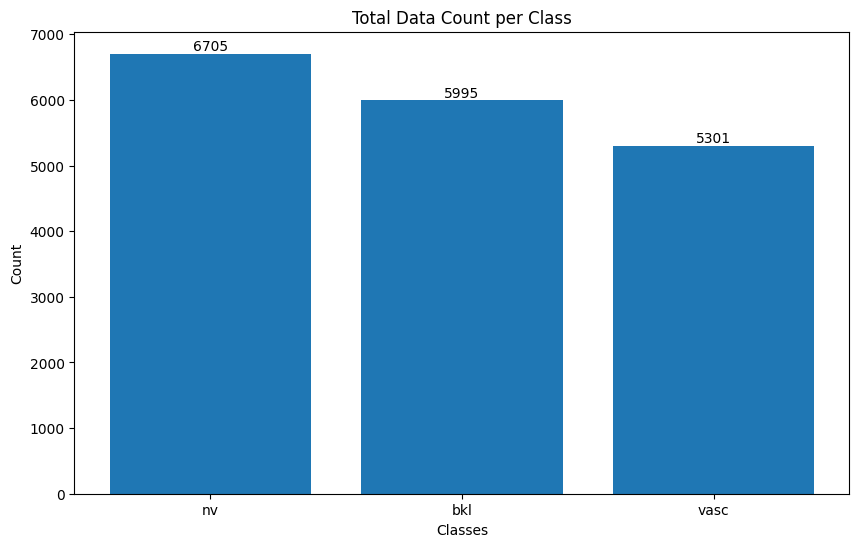

In [ ]:

import os
import matplotlib.pyplot as plt
import seaborn as sns

classes = ['nv', 'bkl', 'vasc']
base_dir = '/content/base_dir'
train_dir = os.path.join(base_dir, 'train_dir')
val_dir = os.path.join(base_dir, 'val_dir')

class_counts = {}

for class_name in classes:
    train_path = os.path.join(train_dir, class_name)
    val_path = os.path.join(val_dir, class_name)

    train_count = len([name for name in os.listdir(train_path) if os.path.isfile(os.path.join(train_path, name))])
    val_count = len([name for name in os.listdir(val_path) if os.path.isfile(os.path.join(val_path, name))])

    total_count = train_count + val_count
    class_counts[class_name] = total_count

plt.figure(figsize=(10, 6))
bars = plt.bar(class_counts.keys(), class_counts.values())
plt.title('Total Data Count per Class')
plt.xlabel('Classes')
plt.ylabel('Count')

for bar, count in zip(bars, class_counts.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')

plt.show()


# Sampling Dataset

In [ ]:
import os
import shutil
import random


def undersample_dataset(source_dirs, target_dir, classes, sample_size):

    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    for class_name in classes:
        class_target_dir = os.path.join(target_dir, class_name)
        os.makedirs(class_target_dir, exist_ok=True)

        class_images = []
        for source_dir in source_dirs:
            class_path = os.path.join(source_dir, class_name)
            if os.path.exists(class_path):
                class_images.extend([os.path.join(class_path, img) for img in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, img))])

        sampled_images = random.sample(class_images, min(sample_size, len(class_images)))

        for image_path in sampled_images:
            try:
                shutil.copy(image_path, class_target_dir)
            except FileNotFoundError:
                print(f"Warning: Image file not found: {image_path}")


source_directories = [train_dir, val_dir]
target_directory = 'Dataset'
selected_classes = ['nv', 'bkl', 'vasc']
desired_sample_size = 5300

undersample_dataset(source_directories, target_directory, selected_classes, desired_sample_size)

print(f"Undersampled dataset created at: {target_directory}")


Undersampled dataset created at: Dataset


In [ ]:
print(len(os.listdir('/content/Dataset/nv')))
print(len(os.listdir('/content/Dataset/bkl')))
print(len(os.listdir('/content/Dataset/vasc')))

5300
5300
5300


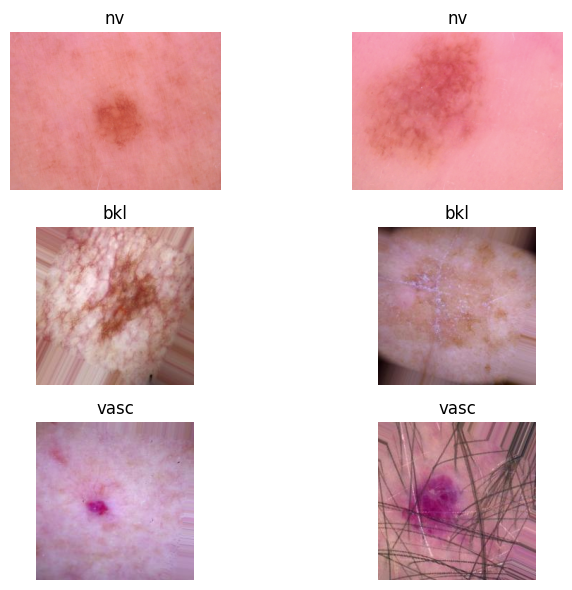

In [ ]:
train_dir = "/content/Dataset"

# Classes to visualize
target_classes = ['nv', 'bkl', 'vasc']

# Number of images per class
images_per_class = 2

# Set up the figure size
fig, axes = plt.subplots(len(target_classes), images_per_class, figsize=(8, 6))

for i, class_name in enumerate(target_classes):
    class_path = os.path.join(train_dir, class_name)

    # Get all image files in the class directory
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Randomly select images
    selected_images = random.sample(image_files, min(images_per_class, len(image_files)))

    for j, image_name in enumerate(selected_images):
        img_path = os.path.join(class_path, image_name)
        img = Image.open(img_path)

        # Plot image
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        axes[i, j].set_title(f"{class_name}")

plt.tight_layout()
plt.show()

In [ ]:
image_h = 224
image_w = 224
BATCH = 32
EPOCH = 30
classes = 3
channels = 3
image_h,image_w

(224, 224)

In [ ]:
dataset_folder = '/content/Dataset'


labels = ['nv', 'bkl', 'vasc']

list_path = []
list_labels = []
for label in labels:
    label_path = os.path.join(dataset_folder, label, "*")
    image_files = glob.glob(label_path)

    sign_label = [label] * len(image_files)


    list_path.extend(image_files)
    list_labels.extend(sign_label)

dataframe = pd.DataFrame({
    "image_path": list_path,
    "label": list_labels
})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    dataframe["image_path"],
    dataframe["label"],
    test_size=0.15,
    random_state=2024,
    shuffle=True,
    stratify = dataframe["label"]
)

train_df = pd.DataFrame({
    "image_path": X_train,
    "label": y_train
})

X_train, X_val, y_train, y_val = train_test_split(
    train_df["image_path"], train_df["label"],
    test_size=0.15,
    random_state=2024,
    shuffle=True,
    stratify=train_df["label"]
)
train_df = pd.DataFrame({
    "image_path": X_train,
    "label": y_train
})
val_df = pd.DataFrame({
    "image_path": X_val,
    "label": y_val
})
test_df = pd.DataFrame({
    "image_path": X_test,
    "label": y_test
})


In [ ]:
datagen = ImageDataGenerator(
    rescale=1/255.,
    # rotation_range=45,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True,
    # vertical_flip=True ,
    # brightness_range=[0.8, 1.2]  # Adjust brightness
    # fill_mode='nearest'
)
# Training Dataset
train_gen = datagen.flow_from_dataframe(
    train_df,
    directory="./",
    x_col="image_path",
    y_col="label",
    class_mode="categorical",
    target_size=(image_h,image_w),
    batch_size=BATCH
)

# Testing Dataset
test_gen = datagen.flow_from_dataframe(
    test_df,
    directory="./",
    x_col="image_path",
    y_col="label",
    class_mode="categorical",
    target_size=(image_h,image_w),
    batch_size=BATCH,
    shuffle=False
)
# Validation Dataset
val_gen = datagen.flow_from_dataframe(
    val_df,
    directory="./",
    x_col="image_path",
    y_col="label",
    class_mode="categorical",
    target_size=(image_h,image_w),
    batch_size=BATCH
)




Found 11487 validated image filenames belonging to 3 classes.
Found 2385 validated image filenames belonging to 3 classes.
Found 2028 validated image filenames belonging to 3 classes.


In [ ]:
print(11487/3)

3829.0


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',
                              patience=5,
                              restore_best_weights=True,
                              verbose=False)

def scheduler(epoch, lr):
    decay = -0.1
    if epoch < 5:
        return float(lr)
    else:
        return float(lr * math.exp((epoch + 1) * decay))

lrscheduler = LearningRateScheduler(scheduler)

checkpoint = ModelCheckpoint(
    "model_checkpoint.keras",
    monitor="val_loss",
    verbose=False,
    save_best_only=True,
    mode="auto",
)

callbacks = [checkpoint, lrscheduler, early_stopping]

# Data 5300 each

In [ ]:
# EfficientNet
base_model = EfficientNetB3(
    weights='imagenet',
    include_top=False,
    input_shape=(image_h, image_w, 3),
    pooling='max'
)

eff_model = Sequential([
    base_model,
    BatchNormalization(),
    Dense(256, activation= 'relu'),
    Dropout(0.2),
    Dense(3, activation= 'softmax',kernel_regularizer= l2(1e-3),name="softmax")
])

eff_model.summary()

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)          │ (None, 1536)                │      10,783,535 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1536)                │           6,144 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         393,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,183,922 (42.66 MB)

 Trainable params: 11,093,547 (42.32 MB)

 Non-trainable params: 90,375 (353.03 KB)

In [ ]:
# Compile the model
eff_model.compile(Adamax(learning_rate= 0.0001), loss= 'categorical_crossentropy', metrics= ['accuracy'])


eff_model.fit(
    train_gen,
    # steps_per_epoch=train_gen.samples // BATCH,
    validation_data=val_gen,
    # validation_steps=val_gen.samples // BATCH,
    epochs=EPOCH,
    callbacks=callbacks,
    verbose=True
)

Epoch 1/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 305s 503ms/step - accuracy: 0.7791 - loss: 0.5335 - val_accuracy: 0.3935 - val_loss: 1.2811 - learning_rate: 1.0000e-04
Epoch 2/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 130s 310ms/step - accuracy: 0.9355 - loss: 0.1773 - val_accuracy: 0.8575 - val_loss: 0.3837 - learning_rate: 1.0000e-04
Epoch 3/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 115s 321ms/step - accuracy: 0.9512 - loss: 0.1301 - val_accuracy: 0.9433 - val_loss: 0.1672 - learning_rate: 1.0000e-04
Epoch 4/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 111s 308ms/step - accuracy: 0.9707 - loss: 0.0867 - val_accuracy: 0.9571 - val_loss: 0.1112 - learning_rate: 1.0000e-04
Epoch 5/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 103s 287ms/step - accuracy: 0.9783 - loss: 0.0660 - val_accuracy: 0.9389 - val_loss: 0.1741 - learning_rate: 1.0000e-04
Epoch 6/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 102s 285ms/step - accuracy: 0.9792 - loss: 0.0622 - val_accuracy: 0.8989 - val_loss: 0.3129 - learning_rate: 5.4881e-05
Epoch 7/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 

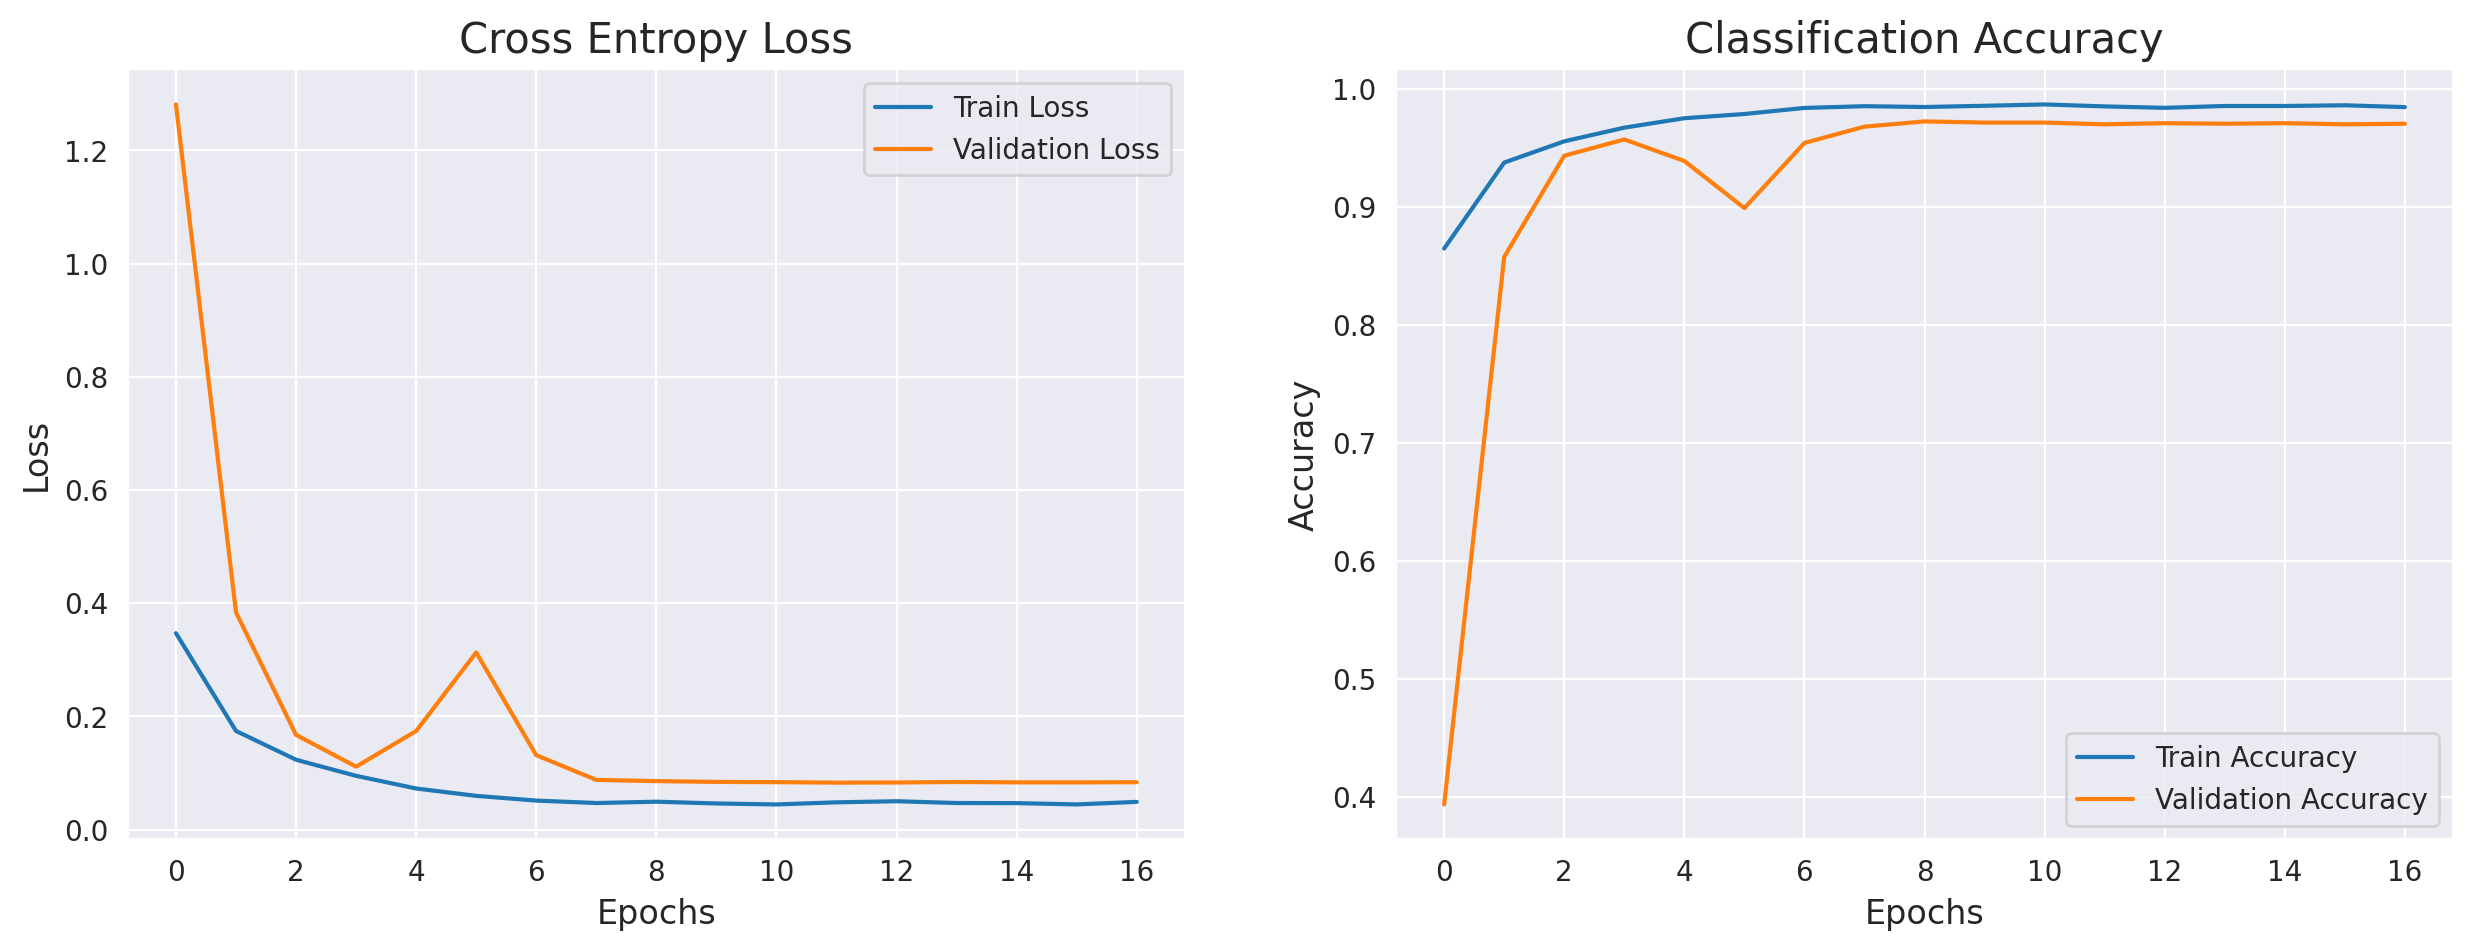


Model Testing 

The accuracy of the model for testing data is: 97.40042090415955
The Loss of the model for testing data is: 0.07927592843770981
Correct predicted classes: 2323
Incorrect predicted classes: 62

Classification Report 

              precision    recall  f1-score   support

         bkl       0.97      0.96      0.96       795
          nv       0.96      0.97      0.96       795
        vasc       1.00      1.00      1.00       795

    accuracy                           0.97      2385
   macro avg       0.97      0.97      0.97      2385
weighted avg       0.97      0.97      0.97      2385

Confusion Matrix 



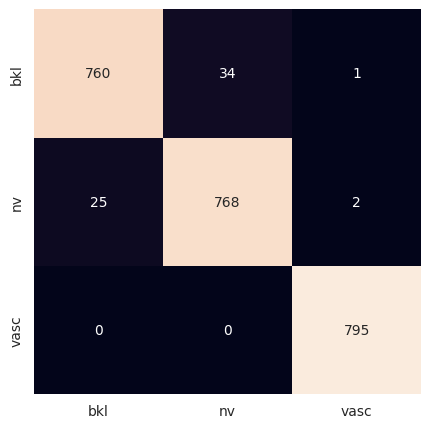

In [ ]:
all_evaluation(eff_model)

# data 3000 each

In [ ]:
# EfficientNet
base_model = EfficientNetB3(
    weights='imagenet',
    include_top=False,
    input_shape=(image_h, image_w, 3),
    pooling='max'
)

eff_model = Sequential([
    base_model,
    BatchNormalization(),
    Dense(256, activation= 'relu'),
    Dropout(0.2),
    Dense(3, activation= 'softmax',kernel_regularizer= l2(1e-3),name="softmax")
])

eff_model.summary()

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)          │ (None, 1536)                │      10,783,535 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1536)                │           6,144 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         393,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,183,922 (42.66 MB)

 Trainable params: 11,093,547 (42.32 MB)

 Non-trainable params: 90,375 (353.03 KB)

In [ ]:
# Compile the model
eff_model.compile(Adamax(learning_rate= 0.0001), loss= 'categorical_crossentropy', metrics= ['accuracy'])


eff_model.fit(
    train_gen,
    # steps_per_epoch=train_gen.samples // BATCH,
    validation_data=val_gen,
    # validation_steps=val_gen.samples // BATCH,
    epochs=EPOCH,
    callbacks=callbacks,
    verbose=True
)

Epoch 1/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 245s 616ms/step - accuracy: 0.7011 - loss: 0.7430 - val_accuracy: 0.3179 - val_loss: 1.9729 - learning_rate: 1.0000e-04
Epoch 2/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 58s 285ms/step - accuracy: 0.9130 - loss: 0.2391 - val_accuracy: 0.5767 - val_loss: 1.0704 - learning_rate: 1.0000e-04
Epoch 3/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 59s 286ms/step - accuracy: 0.9397 - loss: 0.1601 - val_accuracy: 0.8650 - val_loss: 0.3759 - learning_rate: 1.0000e-04
Epoch 4/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 58s 285ms/step - accuracy: 0.9509 - loss: 0.1391 - val_accuracy: 0.9347 - val_loss: 0.1673 - learning_rate: 1.0000e-04
Epoch 5/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 56s 274ms/step - accuracy: 0.9610 - loss: 0.1116 - val_accuracy: 0.9111 - val_loss: 0.2961 - learning_rate: 1.0000e-04
Epoch 6/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 58s 285ms/step - accuracy: 0.9692 - loss: 0.0946 - val_accuracy: 0.9521 - val_loss: 0.1349 - learning_rate: 5.4881e-05
Epoch 7/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 59s 2

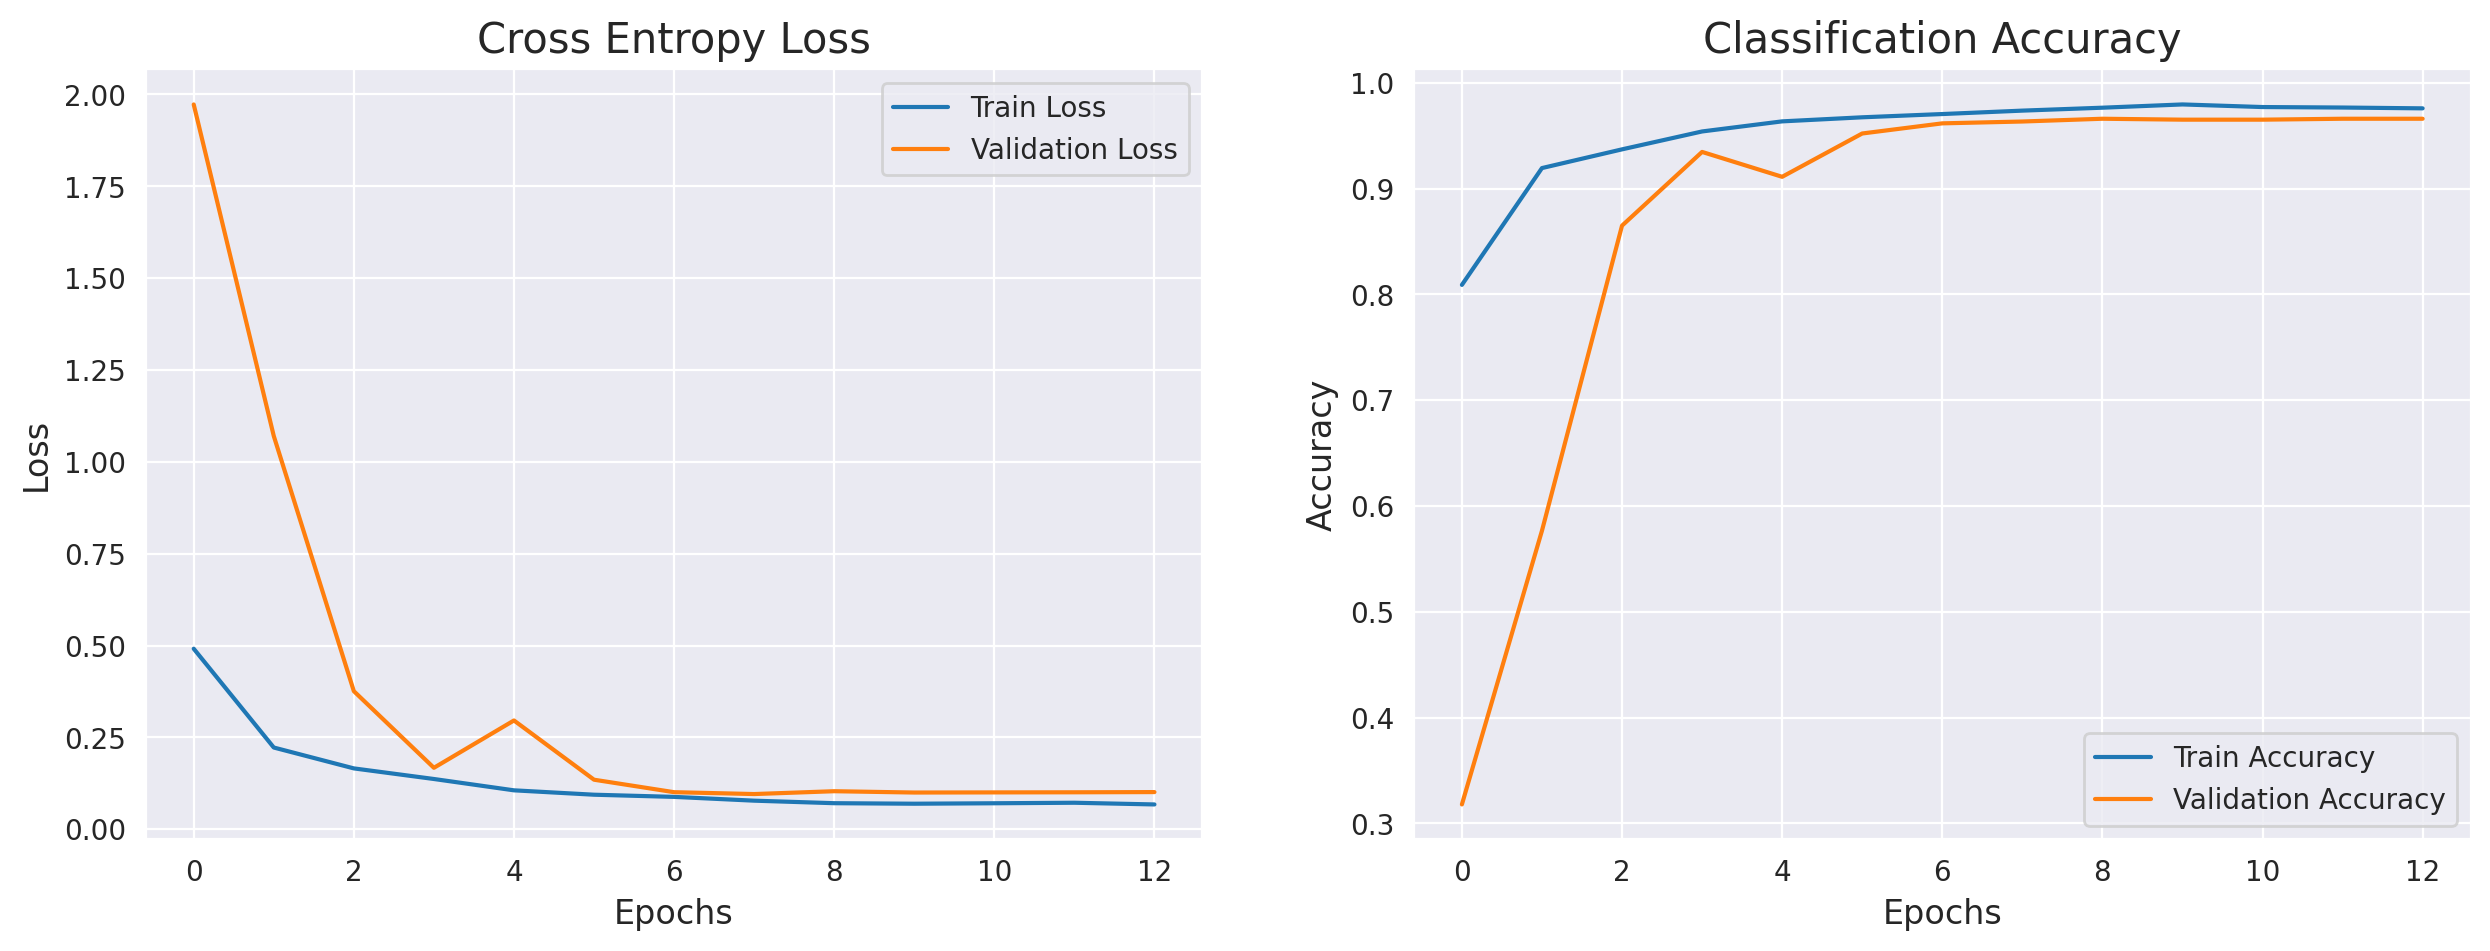

In [ ]:
# graphs
metrics = pd.DataFrame(eff_model.history.history)

plt.figure(figsize=(15,5),dpi=200)
sns.set_style('darkgrid')

  # Loss and Val_loss
plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(metrics['loss'], label='Train Loss')
plt.plot(metrics['val_loss'], label='Validation Loss')
plt.legend()

  # Accuracy and Val_accuracy
plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(metrics['accuracy'], label='Train Accuracy')
plt.plot(metrics['val_accuracy'], label='Validation Accuracy')
plt.legend()

plt.show()

In [ ]:
def all_evaluation(model):

  print('\nModel Testing \n')

  loss, acc = model.evaluate(test_gen, verbose=False)

  print('The accuracy of the model for testing data is:', acc*100)
  print('The Loss of the model for testing data is:', loss)

  predicted_class = model.predict(test_gen, verbose=False)
  predicted_class = np.argmax(predicted_class, axis=1)
  actual_class = test_gen.labels

  correct = np.nonzero(predicted_class == actual_class)[0]
  incorrect = np.nonzero(predicted_class != actual_class)[0]

  print("Correct predicted classes:", correct.shape[0])
  print("Incorrect predicted classes:", incorrect.shape[0])

  # classification report
  print('\nClassification Report \n')


  g_dict = test_gen.class_indices
  categories = list(g_dict.keys())

  print(classification_report(actual_class, predicted_class,
                            target_names=categories))

  # confusion matrix
  print('Confusion Matrix \n')

  con_matrix = tf.math.confusion_matrix(
        labels=actual_class,
        predictions=predicted_class,
        num_classes=classes)

  plt.figure(figsize=(5,5))
  sns.heatmap(con_matrix, annot=True, fmt='g', cbar=False, xticklabels=categories, yticklabels=categories)
  plt.show()




Model Testing 

The accuracy of the model for testing data is: 95.99999785423279
The Loss of the model for testing data is: 0.10374079644680023
Correct predicted classes: 1296
Incorrect predicted classes: 54

Classification Report 

              precision    recall  f1-score   support

         bkl       0.93      0.96      0.95       450
          nv       0.95      0.94      0.94       450
        vasc       1.00      0.99      0.99       450

    accuracy                           0.96      1350
   macro avg       0.96      0.96      0.96      1350
weighted avg       0.96      0.96      0.96      1350

Confusion Matrix 



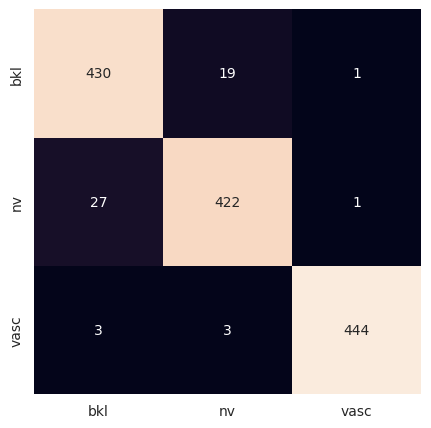

In [ ]:
all_evaluation(eff_model)

In [ ]:
model.save('/content/eff_net_b3_benign_3class_v2.keras')